### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib.legend_handler import HandlerLine2D
import plotly.graph_objects as go
import seaborn as sns

### Data

In [2]:
hotel_df = pd.read_csv('hotel.csv')

In [3]:
pd.set_option('display.max_columns', None)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel_df.shape

(119390, 32)

In [5]:
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Data preprocessing

In [7]:
null_counts = hotel_df.isnull().sum().sort_values(ascending = False)
null_counts

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [8]:
hotel_df.drop('company', axis=1, inplace=True)
hotel_df['children'].fillna(hotel_df['children'].median(), inplace=True)
hotel_df['country'].fillna(hotel_df['country'].mode()[0], inplace=True)
hotel_df['agent'].fillna(0, inplace=True)

In [9]:
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [10]:
hotel_df.drop_duplicates(inplace=True)
hotel_df.drop(hotel_df[hotel_df.adults + hotel_df.babies + hotel_df.children == 0].index, inplace = True)



In [11]:
for i in hotel_df.columns.to_list():
    print ("Number of unique values in ---> {} column are ---> {} \n\n The unique values are {}".format(i, len(hotel_df[i].unique()),hotel_df[i].unique()))
    print ("----------------------------------------------------------------------------------------------------------------------------- \n")

Number of unique values in ---> hotel column are ---> 2 

 The unique values are ['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------------------------------- 

Number of unique values in ---> is_canceled column are ---> 2 

 The unique values are [0 1]
----------------------------------------------------------------------------------------------------------------------------- 

Number of unique values in ---> lead_time column are ---> 479 

 The unique values are [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  4

In [12]:
hotel_df.reset_index(inplace=True)
hotel_df.drop(['reservation_status_date','index','reservation_status'], axis=1, inplace=True)
hotel_df.shape

(87204, 29)

In [13]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87204 entries, 0 to 87203
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87204 non-null  object 
 1   is_canceled                     87204 non-null  int64  
 2   lead_time                       87204 non-null  int64  
 3   arrival_date_year               87204 non-null  int64  
 4   arrival_date_month              87204 non-null  object 
 5   arrival_date_week_number        87204 non-null  int64  
 6   arrival_date_day_of_month       87204 non-null  int64  
 7   stays_in_weekend_nights         87204 non-null  int64  
 8   stays_in_week_nights            87204 non-null  int64  
 9   adults                          87204 non-null  int64  
 10  children                        87204 non-null  float64
 11  babies                          87204 non-null  int64  
 12  meal                            

### Feature Engineering

In [14]:
hotel_df['kids'] = hotel_df.children + hotel_df.babies
hotel_df['Full_stay'] = hotel_df.stays_in_weekend_nights + hotel_df.stays_in_week_nights
hotel_df['Total_members'] = hotel_df.adults + hotel_df.children + hotel_df.babies

In [15]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


@interact(feature=hotel_df.columns.to_list())
def describe_features(feature):
    print ("Number of unique values in {} column are {} \n \nThe unique values are {}".format(feature, len(hotel_df[feature].unique()),hotel_df[feature].unique()))


interactive(children=(Dropdown(description='feature', options=('hotel', 'is_canceled', 'lead_time', 'arrival_d…

In [16]:
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,kids,Full_stay,Total_members
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.00,0,0,0.0,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.00,0,0,0.0,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,0.0,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,0.0,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,0.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87199,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,0.0,7,2.0
87200,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,0.0,7,3.0
87201,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,0.0,7,2.0
87202,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,0.0,7,2.0


### Changing DataType of Features

In [17]:
# Some columns have numeric values but those are actually categorical
categorical_features=["hotel","arrival_date_month","meal","country","market_segment","is_canceled",
                      "distribution_channel","reserved_room_type","assigned_room_type","deposit_type",
                      "customer_type","is_repeated_guest",'arrival_date_year']

numeric_features = [i for i in hotel_df.columns if i not in categorical_features]
print(numeric_features)

['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'kids', 'Full_stay', 'Total_members']


In [18]:
for i in numeric_features:
    hotel_df[i] = hotel_df[i].astype('int64')

In [19]:
hotel_df[categorical_features].dtypes

hotel                   object
arrival_date_month      object
meal                    object
country                 object
market_segment          object
is_canceled              int64
distribution_channel    object
reserved_room_type      object
assigned_room_type      object
deposit_type            object
customer_type           object
is_repeated_guest        int64
arrival_date_year        int64
dtype: object

In [20]:
hotel_df['arrival_date_year']=hotel_df['arrival_date_year'].astype(object)

In [21]:
hotel_df['is_repeated_guest']=hotel_df['is_repeated_guest'].map(lambda x: 'No' if x==0 else 'Yes')

In [22]:
hotel_df['is_canceled']=hotel_df['is_canceled'].map(lambda x: 'No' if x==0 else 'Yes')

In [23]:
hotel_df[categorical_features].dtypes

hotel                   object
arrival_date_month      object
meal                    object
country                 object
market_segment          object
is_canceled             object
distribution_channel    object
reserved_room_type      object
assigned_room_type      object
deposit_type            object
customer_type           object
is_repeated_guest       object
arrival_date_year       object
dtype: object

In [24]:
Target_variable = hotel_df['is_canceled']
hotel_df.drop(['is_canceled'], axis =1, inplace=True)

### One hot encoding categorical features

In [25]:
categorical_Attributes = hotel_df.select_dtypes(include=['object']).columns
categorical_Attributes

Index(['hotel', 'arrival_date_year', 'arrival_date_month', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [26]:
hotel_df = pd.get_dummies(columns=categorical_Attributes, data=hotel_df, prefix=categorical_Attributes, prefix_sep="_", drop_first=True)
print (hotel_df.columns, hotel_df.shape)

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
       ...
       'assigned_room_type_G', 'assigned_room_type_H', 'assigned_room_type_I',
       'assigned_room_type_K', 'assigned_room_type_L',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party'],
      dtype='object', length=248) (87204, 248)


C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


### Training the model (without Hyperparameter tuning)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(hotel_df, Target_variable, test_size=0.25,random_state=123)

In [ ]:
gb_model = GradientBoostingClassifier()

rfe = RFE(estimator=gb_model, n_features_to_select=20, verbose=21) 

rfe.fit(X_train, y_train)

In [ ]:
names=X_train.columns.tolist()

b=rfe.ranking_

#RFE: Recursive Feature Elimination is corresponding to Machine Learning Model.
#ranking is a attribute

a=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b,names))),columns=['rank','features'])

#a.to_csv('feature_selection.csv')

RFE_selected=a['features'][a['rank']==1]

RFE_selected

In [ ]:
# import pickle

# # Save the selected features to a pickle file
# with open('RFE_selected_GradientBoosting_20_with_True.pkl', 'wb') as file:
#     pickle.dump(RFE_selected, file)

In [28]:
import pickle

with open('RFE_selected_GradientBoosting_20_with_True.pkl', 'rb') as file:
    RFE_selected = pickle.load(file)

In [29]:
X_train=X_train[RFE_selected]
X_test=X_test[RFE_selected]

In [30]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [31]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [32]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[43891  3444]
 [ 7786 10282]]
[[14585  1276]
 [ 2555  3385]]


In [33]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
precision_Train = confusion_matrix_train[1, 1]/ (confusion_matrix_train[1, 1]+ confusion_matrix_train[0, 1])
f1_score_Train = 2 * (precision_Train * TPR_Train) / (precision_Train + TPR_Train)

print("Train TNR: ",TNR_Train)
print("Train TPR(Recall): ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)
print("Train Precision: ",precision_Train)
print("Train F1-Score: ",f1_score_Train)

Train TNR:  0.9272419985211788
Train TPR(Recall):  0.5690723931813151
Train Accuracy:  0.8282953381343363
Train Precision:  0.7490893195395599
Train F1-Score:  0.6467887022708687


In [34]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1]) #Recall
precision_Test = confusion_matrix_test[1, 1]/ (confusion_matrix_test[1, 1]+ confusion_matrix_test[0, 1])
f1_score_Test = 2 * (precision_Test * TPR_Test) / (precision_Test + TPR_Test)

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)
print("Test Precision: ",precision_Test)
print("Test F1-Score: ",f1_score_Test)

Test TNR:  0.9195511001828384
Test TPR:  0.5698653198653199
Test Accuracy:  0.8242741158662447
Test Precision:  0.726239004505471
Test F1-Score:  0.6386189982077163


### Feature importances

In [35]:
clf.feature_importances_

array([0.00858971, 0.01853183, 0.05872372, 0.00219298, 0.00436446,
       0.01038142, 0.02811172, 0.00473243, 0.00259555, 0.00222654,
       0.16335198, 0.03450417, 0.04340474, 0.17236425, 0.00848035,
       0.17062862, 0.02207536, 0.03022137, 0.09229642, 0.12222237])

In [36]:
df_imp=pd.DataFrame({'features':X_train.columns,'imortances':clf.feature_importances_})
df_imp=df_imp.sort_values(by='imortances',ascending=False)
df_imp

,features,imortances
13,lead_time,0.172364
15,market_segment_Online TA,0.170629
10,country_PRT,0.163352
19,total_of_special_requests,0.122222
18,required_car_parking_spaces,0.092296
2,agent,0.058724
12,deposit_type_Non Refund,0.043405
11,customer_type_Transient,0.034504
17,previous_cancellations,0.030221
6,booking_changes,0.028112


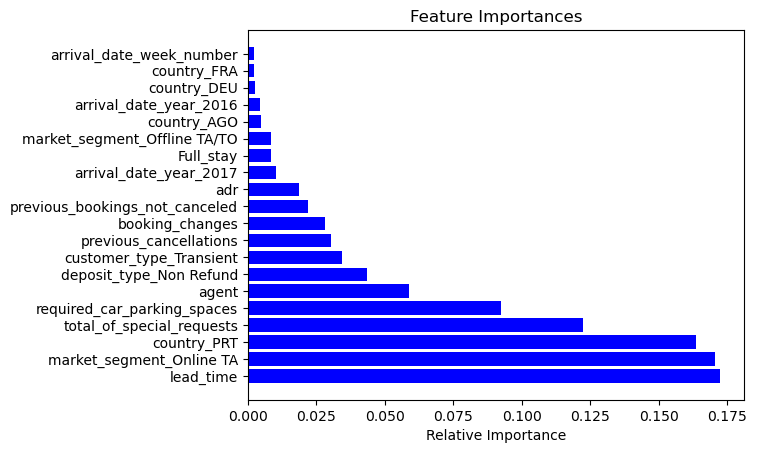

In [37]:
plt.title('Feature Importances')
plt.barh(df_imp['features'], df_imp['imortances'], color='blue')
plt.yticks(df_imp['features'])
plt.xlabel('Relative Importance')
plt.show()

In [38]:
import pickle

# # Save the model to a pickle file
# with open('GradientBoosting_model_20_with_true.pkl', 'wb') as file:
#     pickle.dump(clf, file)

In [39]:
with open('GradientBoosting_model_20_with_true.pkl', 'rb') as file:
    clf2 = pickle.load(file)

### Testing the model

In [40]:
test_results=[]

train_pred = clf2.predict(X_train)
confusion_matrix_train = confusion_matrix(y_train, train_pred)
accuracy_train = (confusion_matrix_train[0,0] + confusion_matrix_train[1,1])/(confusion_matrix_train[0,0] + confusion_matrix_train[0,1] + confusion_matrix_train[1,0] + confusion_matrix_train[1,1])
TNR_train = (confusion_matrix_train[0,0])/(confusion_matrix_train[0,0] + confusion_matrix_train[0,1])
TPR_train = (confusion_matrix_train[1,1])/(confusion_matrix_train[1,1] + confusion_matrix_train[1,0])
precision_Train = confusion_matrix_train[1, 1]/ (confusion_matrix_train[1, 1]+ confusion_matrix_train[0, 1])
f1_score_Train = 2 * (precision_Train * TPR_Train) / (precision_Train + TPR_Train)

    
test_pred = clf2.predict(X_test)
confusion_matrix_test = confusion_matrix(y_test, test_pred)
accuracy_test = (confusion_matrix_test[0,0] + confusion_matrix_test[1,1])/(confusion_matrix_test[0,0] + confusion_matrix_test[0,1] + confusion_matrix_test[1,0] + confusion_matrix_test[1,1])
TNR_test = (confusion_matrix_test[0,0])/(confusion_matrix_test[0,0] + confusion_matrix_test[0,1])
TPR_test = (confusion_matrix_test[1,1])/(confusion_matrix_test[1,1] + confusion_matrix_test[1,0])
precision_Test = confusion_matrix_test[1, 1]/ (confusion_matrix_test[1, 1]+ confusion_matrix_test[0, 1])
f1_score_Test = 2 * (precision_Test * TPR_test) / (precision_Test + TPR_test)
test_results.append(accuracy_test)

print('Accuracy_train: ',accuracy_train)
print('TNR_train: ',TNR_train)
print('TPR_train(Recall): ',TPR_train)
print("Train Precision: ",precision_Train)
print("Train F1-Score: ",f1_score_Train)
print("*"*80)
print('Accuracy_test: ',accuracy_test)
print('TNR_test: ',TNR_test)
print('TPR_test: ',TPR_test)
print("Test Precision: ",precision_Test)
print("Test F1-Score: ",f1_score_Test)

Accuracy_train:  0.8282953381343363
TNR_train:  0.9272419985211788
TPR_train(Recall):  0.5690723931813151
Train Precision:  0.7490893195395599
Train F1-Score:  0.6467887022708687
********************************************************************************
Accuracy_test:  0.8242741158662447
TNR_test:  0.9195511001828384
TPR_test:  0.5698653198653199
Test Precision:  0.726239004505471
Test F1-Score:  0.6386189982077163


In [41]:
def get_predictions(X_train,y_train):
    y_train_pred_final = pd.DataFrame({'is_canceled':y_train.values, 'is_canceled_Prob':clf2.predict_proba(X_train)[:,1]})
    y_train_pred_final['Index'] = y_train.index
    y_train_pred_final = y_train_pred_final.reindex(['Index','is_canceled','is_canceled_Prob'], axis=1)
    y_train_pred_final['predicted'] = y_train_pred_final.is_canceled_Prob.map(lambda x: 1 if x > 0.5 else 0)
    y_train_pred_final['predicted'] = y_train_pred_final['predicted'].map(lambda x: 'No' if x==0 else 'Yes')
    return y_train_pred_final
    
y_train_pred_final=get_predictions(X_train,y_train)    
# Let's see the head
y_train_pred_final.head()

,Index,is_canceled,is_canceled_Prob,predicted
0,54598,No,0.299383,No
1,48147,Yes,0.645049,Yes
2,77538,No,0.437103,No
3,29112,No,0.121633,No
4,3265,No,0.033327,No


In [42]:
def get_predictions(X_test,y_test):
    y_test_pred_final = pd.DataFrame({'is_canceled':y_test.values, 'is_canceled_Prob':clf2.predict_proba(X_test)[:,1]})
    y_test_pred_final['Index'] = y_test.index
    y_test_pred_final = y_test_pred_final.reindex(['is_canceled','is_canceled_Prob'], axis=1)
    y_test_pred_final['predicted'] = y_test_pred_final.is_canceled_Prob.map(lambda x: 1 if x > 0.5 else 0)
    y_test_pred_final['predicted'] = y_test_pred_final['predicted'].map(lambda x: 'No' if x==0 else 'Yes')
    return y_test_pred_final
    
y_test_pred_final=get_predictions(X_test,y_test)    
# Let's see the head
y_test_pred_final.head()

,is_canceled,is_canceled_Prob,predicted
0,No,0.066407,No
1,No,0.068759,No
2,No,0.198813,No
3,No,0.019941,No
4,No,0.101257,No


In [43]:
def generate_model_result_proba(y_train,predicted):
    confusion = confusion_matrix(y_train, predicted )
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    result_df={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}
    
    return result_df
    
result_df_train=generate_model_result_proba(y_train,y_train_pred_final['predicted'])
print(result_df_train)

{'accuracy': 0.828, 'recall': 0.569, 'precision': 0.749, 'FPR': 0.073, 'specificity': 0.927}


In [44]:
def generate_model_result_proba(y_test,predicted):
    confusion = confusion_matrix(y_test, predicted )
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    result_df={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}
    
    return result_df
    
result_df_test=generate_model_result_proba(y_test,y_test_pred_final['predicted'])
print(result_df_test)

{'accuracy': 0.824, 'recall': 0.57, 'precision': 0.726, 'FPR': 0.08, 'specificity': 0.92}


### ROC Curve

In [46]:
from sklearn import metrics
def draw_roc_seaborn(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)

    plt.figure(figsize=(8, 6))
    sns.set(style='whitegrid')

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})', linewidth=2)

    # Plot random line
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

    # Set labels and title
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')

    # Show legend
    plt.legend()

    # Show plot
    plt.show()

    return None

In [47]:
y_train_pred_final['is_canceled'] = y_train_pred_final['is_canceled'].map(lambda x: 0 if x=='No' else 1)

In [48]:
y_test_pred_final['is_canceled'] = y_test_pred_final['is_canceled'].map(lambda x: 0 if x=='No' else 1)

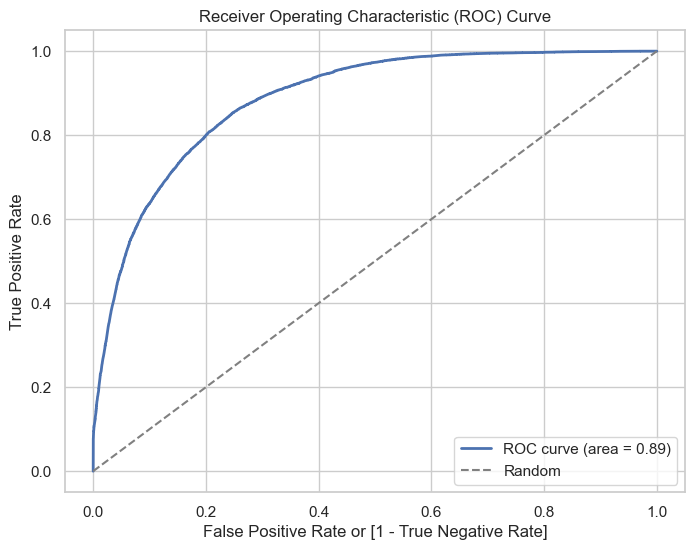

In [49]:

draw_roc_seaborn(y_train_pred_final.is_canceled, y_train_pred_final.is_canceled_Prob)

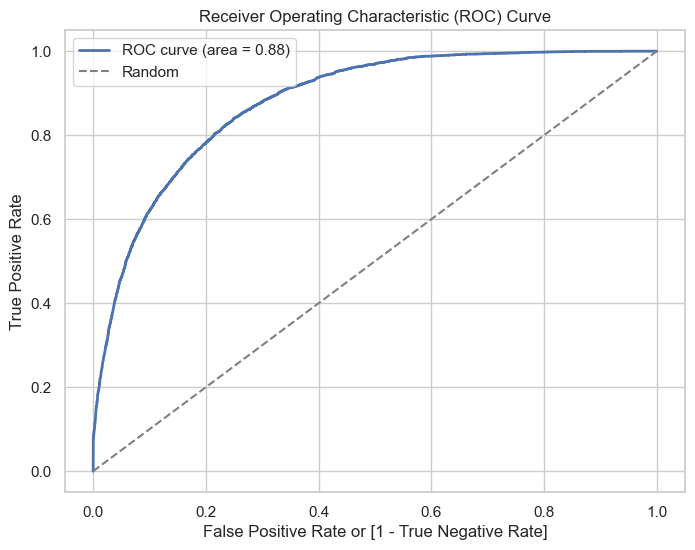

In [50]:
draw_roc_seaborn(y_test_pred_final.is_canceled, y_test_pred_final.is_canceled_Prob)

### Threshold Analysis

In [51]:
#in model building we prefer test dataset prediction probabilities to decide optimum threshold
#on test dataset 
y_test_pred_final

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.is_canceled_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

,is_canceled,is_canceled_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.066407,No,1,0,0,0,0,0,0,0,0,0
1,0,0.068759,No,1,0,0,0,0,0,0,0,0,0
2,0,0.198813,No,1,1,0,0,0,0,0,0,0,0
3,0,0.019941,No,1,0,0,0,0,0,0,0,0,0
4,0,0.101257,No,1,1,0,0,0,0,0,0,0,0


In [52]:
y_test_pred_final['predicted'] = y_test_pred_final['predicted'].map(lambda x: 0 if x=='No' else 1)
y_test_pred_final.head()

,is_canceled,is_canceled_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.066407,0,1,0,0,0,0,0,0,0,0,0
1,0,0.068759,0,1,0,0,0,0,0,0,0,0,0
2,0,0.198813,0,1,1,0,0,0,0,0,0,0,0
3,0,0.019941,0,1,0,0,0,0,0,0,0,0,0
4,0,0.101257,0,1,1,0,0,0,0,0,0,0,0


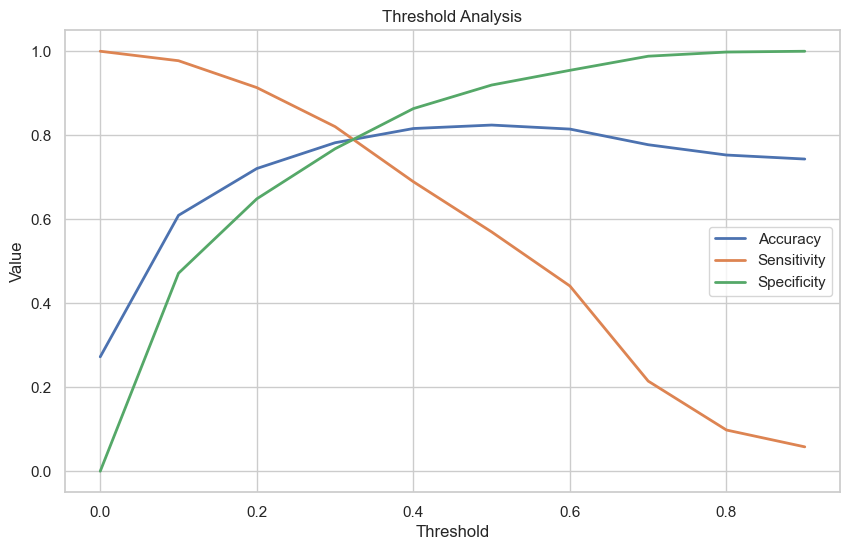

In [53]:
# Initialize cutoff_df
cutoff_df = pd.DataFrame(columns=['threshold', 'accuracy', 'sensi', 'speci'])

# Set probability thresholds
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Calculate metrics for each threshold
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final['is_canceled'], (y_test_pred_final[i] > i).astype(int))
    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

# Plotting using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Plotting accuracy, sensitivity, and specificity
sns.lineplot(x='threshold', y='accuracy', data=cutoff_df, label='Accuracy', linewidth=2)
sns.lineplot(x='threshold', y='sensi', data=cutoff_df, label='Sensitivity', linewidth=2)
sns.lineplot(x='threshold', y='speci', data=cutoff_df, label='Specificity', linewidth=2)

# Set labels and title
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Threshold Analysis')

# Show legend
plt.legend()

# Show plot
plt.show()

### Test Results

In [54]:
y_train_pred_final['final_predicted'] = y_train_pred_final.is_canceled_Prob.map( lambda x: 1 if x > 0.324 else 0)

y_train_pred_final.head()

,Index,is_canceled,is_canceled_Prob,predicted,final_predicted
0,54598,0,0.299383,No,0
1,48147,1,0.645049,Yes,1
2,77538,0,0.437103,No,1
3,29112,0,0.121633,No,0
4,3265,0,0.033327,No,0


In [55]:
y_train_pred_final['final_predicted'] = y_train_pred_final['final_predicted'].map(lambda x: 'No' if x==0 else 'Yes')

In [56]:
result_df_train_0324=generate_model_result_proba(y_train,y_train_pred_final['final_predicted'])

In [57]:
y_test_pred_final['final_predicted'] = y_test_pred_final.is_canceled_Prob.map( lambda x: 1 if x > 0.324 else 0)

y_test_pred_final.head()

,is_canceled,is_canceled_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.066407,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.068759,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.198813,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.019941,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.101257,0,1,1,0,0,0,0,0,0,0,0,0


In [58]:
y_test_pred_final['final_predicted'] = y_test_pred_final['final_predicted'].map(lambda x: 'No' if x==0 else 'Yes')

In [59]:
result_df_test_0324=generate_model_result_proba(y_test,y_test_pred_final['final_predicted'])

In [60]:
result_df_train_0324

{'accuracy': 0.802,
 'recall': 0.789,
 'precision': 0.61,
 'FPR': 0.193,
 'specificity': 0.807}

In [61]:
result_df_test_0324

{'accuracy': 0.794,
 'recall': 0.786,
 'precision': 0.592,
 'FPR': 0.203,
 'specificity': 0.797}